<a href="https://colab.research.google.com/github/TheAmirHK/ReinforcementLearning_projects/blob/main/MazeRunner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gymnasium
!pip install gymnasium[box2d]
!pip install gymnasium[classic_control]
!pip install gymnasium[mujoco]
!pip install stable-baselines3

In [2]:
small_maze = [
    [0, 0, 0, 0, 1],
    [1, 1, 0, 1, 1],
    [0, 0, 0, 1, 0],
    [0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0]
]


medium_maze = [
    [0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 1, 0, 1, 1, 0],
    [0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
    [1, 1, 0, 1, 1, 1, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 1, 1, 1, 1, 1, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [1, 1, 1, 1, 0, 1, 1, 1, 1, 0],
    [0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
    [0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
]

large_maze = [
    [0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0],
    [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0],
    [0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
    [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0],
    [0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
]

In [3]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np

class MazeEnv(gym.Env):
    def __init__(self, maze):
        super(MazeEnv, self).__init__()

        self.maze = maze
        self.start_pos = (0, 0)
        self.goal_pos = (len(maze)-1, len(maze[0])-1)
        self.current_pos = self.start_pos

        self.action_space = spaces.Discrete(4)

        self.observation_space = spaces.Box(
            low=0, high=max(len(maze), len(maze[0])),
            shape=(2,), dtype=np.int32
        )

    def reset(self, seed=None):
        """Resets the environment to the initial state.

        Args:
            seed (int, optional): The seed for random number generation. Defaults to None.
        """
        super().reset(seed=seed)
        self.current_pos = self.start_pos
        return np.array(self.current_pos, dtype=np.int32), {}

    def step(self, action):
        x, y = self.current_pos

        if action == 0 and x > 0:
            x -= 1
        elif action == 1 and x < len(self.maze)-1:
            x += 1
        elif action == 2 and y > 0:
            y -= 1
        elif action == 3 and y < len(self.maze[0])-1:
            y += 1

        if self.maze[x][y] == 1:
            reward = -1
            done = False
        else:
            self.current_pos = (x, y)
            reward = 0
            done = False

        if self.current_pos == self.goal_pos:
            reward = 10
            done = True

        return np.array(self.current_pos, dtype=np.int32), reward, done, False, {}

    def render(self):
        for i in range(len(self.maze)):
            row = ''
            for j in range(len(self.maze[0])):
                if (i, j) == self.current_pos:
                    row += 'R ' # runner
                elif (i, j) == self.goal_pos:
                    row += 'F '  # freedom
                elif self.maze[i][j] == 1:
                    row += '# '  # Wall
                else:
                    row += '. '
            print(row)
        print()


In [4]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_maze(maze, start, goal, path=None):
    """
    Visualize the maze with walls, paths, start, and goal.

    Args:
        maze (list of lists): The maze matrix with 0s and 1s.
        start (tuple): The starting position (row, col).
        goal (tuple): The goal position (row, col).
        path (list of tuples): The trajectory of the ball (optional).
    """
    maze = np.array(maze)
    nrows, ncols = maze.shape

    fig, ax = plt.subplots(figsize=(8, 8))

    for r in range(nrows):
        for c in range(ncols):
            if maze[r, c] == 1:
                ax.add_patch(plt.Rectangle((c, nrows - 1 - r), 1, 1, color="black"))

    ax.add_patch(plt.Rectangle((start[1], nrows - 1 - start[0]), 1, 1, color="green", label="Start"))

    ax.add_patch(plt.Rectangle((goal[1], nrows - 1 - goal[0]), 1, 1, color="red", label="Goal"))

    if path:
        for (x, y) in path:
            ax.add_patch(plt.Rectangle((y, nrows - 1 - x), 1, 1, color="blue", alpha=0.5))

    ax.set_xticks(np.arange(0, ncols, 1))
    ax.set_yticks(np.arange(0, nrows, 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(color="gray", linestyle="-", linewidth=0.5)

    ax.set_xlim(0, ncols)
    ax.set_ylim(0, nrows)
    ax.set_aspect("equal")
    ax.legend(loc="upper right")
    plt.title("Maze Visualization")
    plt.show()


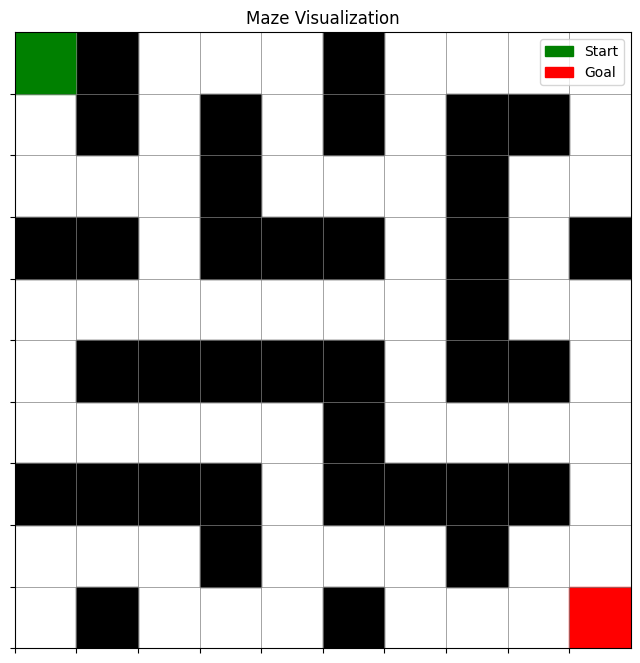

In [24]:
# import the maze from the frist block
maze = medium_maze

# Visualize the maze
start_position = (0, 0)
goal_position = (len(maze)-1, len(maze)-1)

visualize_maze(maze, start_position, goal_position)


In [25]:
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env

env = MazeEnv(maze)

check_env(env, warn=True)

model = PPO("MlpPolicy", env, verbose=1, learning_rate=0.000005)
model.learn(total_timesteps=10000)

model.save("maze_runner")


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 652      |
|    ep_rew_mean     | -240     |
| time/              |          |
|    fps             | 1006     |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 560           |
|    ep_rew_mean          | -204          |
| time/                   |               |
|    fps                  | 830           |
|    iterations           | 2             |
|    time_elapsed         | 4             |
|    total_timesteps      | 4096          |
| train/                  |               |
|    approx_kl            | 6.0562656e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2       

In [26]:
model = PPO.load("maze_runner")

obs, _ = env.reset()
done = False
while not done:
    action, _ = model.predict(obs)
    obs, reward, done, _, _ = env.step(action)
    env.render()


Streaming output truncated to the last 5000 lines.
. # # # # # . # # . 
. . . . . # . . . . 
# # # # . # # # # . 
. . . # . . . # . . 
. # . . . # . . . F 

. # . . . # . . . . 
R # . # . # . # # . 
. . . # . . . # . . 
# # . # # # . # . # 
. . . . . . . # . . 
. # # # # # . # # . 
. . . . . # . . . . 
# # # # . # # # # . 
. . . # . . . # . . 
. # . . . # . . . F 

. # . . . # . . . . 
. # . # . # . # # . 
R . . # . . . # . . 
# # . # # # . # . # 
. . . . . . . # . . 
. # # # # # . # # . 
. . . . . # . . . . 
# # # # . # # # # . 
. . . # . . . # . . 
. # . . . # . . . F 

. # . . . # . . . . 
. # . # . # . # # . 
. R . # . . . # . . 
# # . # # # . # . # 
. . . . . . . # . . 
. # # # # # . # # . 
. . . . . # . . . . 
# # # # . # # # # . 
. . . # . . . # . . 
. # . . . # . . . F 

. # . . . # . . . . 
. # . # . # . # # . 
. R . # . . . # . . 
# # . # # # . # . # 
. . . . . . . # . . 
. # # # # # . # # . 
. . . . . # . . . . 
# # # # . # # # # . 
. . . # . . . # . . 
. # . . . # . . . F 
